In [1]:
#*************************************************************************************#
#Results Expected: Table 1.1
#How many unique companies are present in rounds2?
#How many unique companies are present in companies?
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
#*************************************************************************************#
#*************************************************************************************#
# loading libraries and reading the data from companies.txt and rounds2

import numpy as np
import pandas as pd

companies = pd.read_csv("companies.txt",sep ="\t",encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding="ISO-8859-1", engine="python")

#The permalink and company_permalink fields in the both files have names in mixed cases and have non ASCII characters
# which need to be treated

#Convert the permalink and company_permalink fields to uppercase
companies['permalink'] = companies['permalink'].str.upper()
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()

#Function to remove non AsCII characters

def remove_non_ascii(charac):
    return ''.join(i for i in charac if ord(i)<100)

companies['permalink'] = companies['permalink'].apply(remove_non_ascii) 
rounds2['company_permalink'] = rounds2['company_permalink'].apply(remove_non_ascii)

# Print the output

print("The count of unique companies in companies is :",len(companies['permalink'].unique()))
print("The count of unique companies in rounds2 is :",len(rounds2['company_permalink'].unique()))

The count of unique companies in companies is : 66368
The count of unique companies in rounds2 is : 66368


In [2]:
#*************************************************************************************#
#Results Expected: Table 1.1
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
#**********************************************************************************************#
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
# Merge on treated data using left join to ensure all data from rounds2 is captured

# Remove all spaces from the values in permalink and company_permalink fields 
companies['permalink'] = companies['permalink'].str.replace(' ', '')
rounds2['company_permalink'] = rounds2['company_permalink'].str.replace(' ', '')

master_frame = pd.merge(rounds2,companies,how='left',left_on='company_permalink', right_on='permalink')
print("The count of companies in rounds2 not present in companies is :",master_frame['permalink'].isnull().sum())


The count of companies in rounds2 not present in companies is : 0


In [3]:
#*************************************************************************************#
#Results Expected: Table 1.1
#How many observations are present in master_frame?
#**********************************************************************************************#

print("The observation of master_frame in terms on (rows,columns) is :",master_frame.shape)


The observation of master_frame in terms on (rows,columns) is : (114949, 16)


In [4]:
#*************************************************************************************#
#Results Expected: Table 2.1
#**************************************************************************************#
# Choose only 4 funding types as required
master_frame['funding_round_type'] = master_frame['funding_round_type'].str.upper()
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(['VENTURE','SEED','ANGEL','PRIVATE_EQUITY'])]
master_frame.info()
print('\n')
# Find % of missing values in each fields.
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))
print('\n')
print(master_frame.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94397 entries, 0 to 114947
Data columns (total 16 columns):
company_permalink          94397 non-null object
funding_round_permalink    94397 non-null object
funding_round_type         94397 non-null object
funding_round_code         31120 non-null object
funded_at                  94397 non-null object
raised_amount_usd          80627 non-null float64
permalink                  94397 non-null object
name                       94396 non-null object
homepage_url               90252 non-null object
category_list              91900 non-null object
status                     94397 non-null object
country_code               87076 non-null object
state_code                 85118 non-null object
region                     85838 non-null object
city                       85841 non-null object
founded_at                 77678 non-null object
dtypes: float64(1), object(15)
memory usage: 12.2+ MB


company_permalink           0.00
funding_round_pe

In [5]:
# deleting the rows where raised_amount_usd is null as it cannot be filled - to avoid large bias.The MIN,MAX and MEAN values of 
#raised_amount_usd are widespread to make any assumptions
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))
print('\n')
print(master_frame.shape)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         65.08
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.27
category_list               1.06
status                      0.00
country_code                6.23
state_code                  8.15
region                      7.52
city                        7.52
founded_at                 16.68
dtype: float64


(80627, 16)


In [6]:
#Results Expected: Table 2.1
#Average funding amount of venture type
#Average funding amount of angel type
#Average funding amount of seed type
#Average funding amount of private equity type

# Finding the average funding by funding type

df_byfundtype = master_frame.groupby('funding_round_type')

df_byfundtype.raised_amount_usd.mean().sort_values(ascending = False)   

funding_round_type
PRIVATE_EQUITY    7.330859e+07
VENTURE           1.174895e+07
ANGEL             9.586945e+05
SEED              7.198180e+05
Name: raised_amount_usd, dtype: float64

In [7]:
#Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment
#type is the most suitable for them?
# ANSWER : Venture Type
df_byfundtype.describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
ANGEL                         4860.0  9.586945e+05  7.404397e+06  0.0   
PRIVATE_EQUITY                1936.0  7.330859e+07  1.981135e+08  0.0   
SEED                         23603.0  7.198180e+05  2.221733e+06  0.0   
VENTURE                      50228.0  1.174895e+07  8.635207e+07  0.0   

                                                                      
                           25%         50%         75%           max  
funding_round_type                                                    
ANGEL                150000.00    400000.0   1000000.0  4.945120e+08  
PRIVATE_EQUITY      5000000.00  20000000.0  75000000.0  4.745460e+09  
SEED                  55000.00    275000.0   1000000.0  2.000000e+08  
VENTURE             1600901.75   5000000.0  12000000.0  1.760000e+10

In [8]:
#*************************************************************************************#
#Results Expected: Table 3.1
#**************************************************************************************#
# Select only recommended fund type = Venture and treating the raised_amount_usd
master_frame['funding_round_type'] = master_frame['funding_round_type'].str.upper()
############### to be used in plot in later program
amount_limit = pd.DataFrame(master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :])
###############
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(['VENTURE'])]
master_frame.info()
print('\n')
print(master_frame.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funding_round_code         28043 non-null object
funded_at                  50228 non-null object
raised_amount_usd          50228 non-null float64
permalink                  50228 non-null object
name                       50228 non-null object
homepage_url               47620 non-null object
category_list              49726 non-null object
status                     50228 non-null object
country_code               48111 non-null object
state_code                 47367 non-null object
region                     47515 non-null object
city                       47515 non-null object
founded_at                 40597 non-null object
dtypes: float64(1), object(15)
memory usage: 6.5+ MB


(50228, 16)


In [9]:
#***********************************************************************************************
#Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.
#***********************************************************************************************
# Read the file with list of english speaking countries and select only the countries where English is official language
#***********************************************************************************************

english = pd.read_csv("Official_English.csv",encoding = "ISO-8859-1")
# Since Sparks wants to invest in only English speaking countries we do an inner join.
master_frame = pd.merge(master_frame,english,how='inner',left_on='country_code', right_on='Code')
# Dropping the fileds contained Official_English.csv as they are not needed in master_frame
master_frame.drop(['Code'], axis = 1, inplace = True)
master_frame.drop(['Country'], axis = 1, inplace = True)
master_frame.drop(['Language'], axis = 1, inplace = True)
master_frame.info()
print(master_frame.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41259 entries, 0 to 41258
Data columns (total 16 columns):
company_permalink          41259 non-null object
funding_round_permalink    41259 non-null object
funding_round_type         41259 non-null object
funding_round_code         22306 non-null object
funded_at                  41259 non-null object
raised_amount_usd          41259 non-null float64
permalink                  41259 non-null object
name                       41259 non-null object
homepage_url               39320 non-null object
category_list              41029 non-null object
status                     41259 non-null object
country_code               41259 non-null object
state_code                 40919 non-null object
region                     41067 non-null object
city                       41067 non-null object
founded_at                 34478 non-null object
dtypes: float64(1), object(15)
memory usage: 5.4+ MB
(41259, 16)


In [10]:
# select the top 9 english  speaking countries for venture fund type and create a dataframe top9
df_bycountry = master_frame.groupby(['country_code'],as_index=False)
top9 = pd.DataFrame(df_bycountry.raised_amount_usd.sum())
sort_top9 =top9.sort_values(by=['raised_amount_usd'],ascending=False)
#top9 English speaking countries with Venture type investment

sort_top9.head(9)

,country_code,raised_amount_usd
19,USA,4.225108e+11
4,GBR,2.024563e+10
6,IND,1.439186e+10
2,CAN,9.583332e+09
16,SGP,2.793918e+09
0,AUS,2.645870e+09
7,IRL,1.676131e+09
13,NZL,4.483164e+08
12,NGA,2.454400e+08


In [11]:
# Top 3 countries are
sort_top9.head(9)['country_code'].iloc[0:3]

19    USA
4     GBR
6     IND
Name: country_code, dtype: object

In [12]:
df_byfundtype = master_frame.groupby(['country_code','funding_round_type'])
df_byfundtype.raised_amount_usd.describe()


,,count,mean,std,min,25%,50%,75%,max
country_code,funding_round_type,,,,,,,,
AUS,VENTURE,412.0,6.422014e+06,9.577136e+06,7000.0,1618786.00,3850000.0,6800000.00,7.200000e+07
BWA,VENTURE,2.0,1.125000e+06,5.303301e+05,750000.0,937500.00,1125000.0,1312500.00,1.500000e+06
CAN,VENTURE,1256.0,7.630042e+06,1.162345e+07,4697.0,1286319.25,4000000.0,9253585.25,1.650000e+08
CMR,VENTURE,3.0,1.198537e+05,1.177945e+05,4561.0,59780.50,115000.0,177500.00,2.400000e+05
GBR,VENTURE,2055.0,9.851887e+06,2.762997e+07,0.0,1580000.00,4300000.0,10119107.00,9.150000e+08
GHA,VENTURE,3.0,1.040000e+07,7.967434e+06,1200000.0,8100000.00,15000000.0,15000000.00,1.500000e+07
IND,VENTURE,824.0,1.746585e+07,5.255397e+07,0.0,3000000.00,7500000.0,15000000.00,1.000000e+09
IRL,VENTURE,222.0,7.550141e+06,1.203228e+07,26519.0,1349546.25,3264541.5,8925000.00,1.157940e+08
KEN,VENTURE,7.0,7.705714e+06,6.409750e+06,1000000.0,3050000.00,6000000.0,11000000.00,1.884000e+07


In [13]:
#*************************************************************************************#
#Results Expected: Table 5.1
#Extract the primary sector of each category list from the category_list column
#**************************************************************************************#
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]
master_frame.info()
print(master_frame.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41259 entries, 0 to 41258
Data columns (total 17 columns):
company_permalink          41259 non-null object
funding_round_permalink    41259 non-null object
funding_round_type         41259 non-null object
funding_round_code         22306 non-null object
funded_at                  41259 non-null object
raised_amount_usd          41259 non-null float64
permalink                  41259 non-null object
name                       41259 non-null object
homepage_url               39320 non-null object
category_list              41029 non-null object
status                     41259 non-null object
country_code               41259 non-null object
state_code                 40919 non-null object
region                     41067 non-null object
city                       41067 non-null object
founded_at                 34478 non-null object
primary_sector             41029 non-null object
dtypes: float64(1), object(16)
memory usage: 5.7+ MB
(412

In [14]:
#*************************************************************************************#
#Results Expected: Table 5.1
#Select the mapping file and Extract the major sector of each category list
#Expected Results: Code for a merged data frame with each primary sector mapped to 
# its main sector (the primary sector should be present in a separate column).
#**************************************************************************************#
sector = pd.read_csv("mapping.csv", encoding="ISO-8859-1", engine="python")
# Traeting the category list values in mapping file.
sector['category_list'] = sector['category_list'].str.replace('0','na')
sector['category_list'] = sector['category_list'].str.replace('2.na','2.0')
# Dropping Blanks as it is not a major sector.
sector.drop(['Blanks'],axis=1,inplace=True)
master_frame = master_frame[master_frame.primary_sector.notnull()]
master_frame = pd.merge(master_frame,sector,how='inner',left_on='primary_sector', right_on='category_list')
master_frame = master_frame.rename(columns={'category_list_x': 'category_list'})
#This process is to map the category list values to the major sector.

for i in master_frame[['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']].columns:
    master_frame[i].replace(1,i,inplace=True)
    
master_frame['main_sector']=master_frame.apply(lambda x:'%s%s%s%s%s%s%s%s' % (x['Automotive & Sports'],x['Cleantech / Semiconductors'],x['Entertainment'],x['Health'],x['Manufacturing'],x['News, Search and Messaging'],x['Others'],x['Social, Finance, Analytics, Advertising']),axis=1)   
master_frame['main_sector'] = master_frame['main_sector'].str.replace('0', '')
master_frame.drop(['Automotive & Sports'], axis = 1, inplace = True)
master_frame.drop(['Cleantech / Semiconductors'], axis = 1, inplace = True)
master_frame.drop(['Entertainment'], axis = 1, inplace = True)
master_frame.drop(['Health'], axis = 1, inplace = True)
master_frame.drop(['Manufacturing'], axis = 1, inplace = True)
master_frame.drop(['News, Search and Messaging'], axis = 1, inplace = True)
master_frame.drop(['Others'], axis = 1, inplace = True)
master_frame.drop(['Social, Finance, Analytics, Advertising'], axis = 1, inplace = True)
master_frame.drop(['category_list_y'], axis = 1, inplace = True)

master_frame.info()
print(master_frame.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40863 entries, 0 to 40862
Data columns (total 18 columns):
company_permalink          40863 non-null object
funding_round_permalink    40863 non-null object
funding_round_type         40863 non-null object
funding_round_code         22102 non-null object
funded_at                  40863 non-null object
raised_amount_usd          40863 non-null float64
permalink                  40863 non-null object
name                       40863 non-null object
homepage_url               38998 non-null object
category_list              40863 non-null object
status                     40863 non-null object
country_code               40863 non-null object
state_code                 40526 non-null object
region                     40673 non-null object
city                       40673 non-null object
founded_at                 34279 non-null object
primary_sector             40863 non-null object
main_sector                40863 non-null object
dtypes: 

In [15]:
####################################################################################
#Now we have a data frame with each company’s main sector (main_sector) mapped to it
#We know the top three English speaking countries and the most suitable funding type for Spark Funds
#Country 1', 'Country 2' and 'Country 3' and the funding type 'Venture'.
#The range of funding preferred by Spark Funds is 5 to 15 million USD.
###########################################################################################
#The aim is to find out the most heavily invested main sectors in each of the three countries
#(for funding type Venture and investments range of 5-15 M USD).
###############################################################################################

# resctricting the analysis for 5M to 15 M $
investment = pd.DataFrame(master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :])
#########################################################################################
# Processing the the top country first by using sort_top9.head(9) values using iloc[0]
#########################################################################################
USA = investment.loc[investment['country_code'].isin([sort_top9.head(9)['country_code'].iloc[0]])]
maingroup_usa = USA.groupby(['main_sector'],as_index=False)
counts_usa = pd.DataFrame(maingroup_usa.count())
sums_usa = pd.DataFrame(maingroup_usa.sum())  
counts_usa = counts_usa[['main_sector','primary_sector']]
counts_usa = counts_usa.rename(columns={'primary_sector': 'main_sector_count'})
sums_usa = sums_usa.rename(columns={'raised_amount_usd': 'main_sector_total_amount'})
D1_USA = pd.merge(counts_usa,sums_usa[['main_sector','main_sector_total_amount']],on='main_sector', how='left')
#Dataframe D1 with the following:
   #All the columns of the master_frame along with the primary sector and the main sector
   #The total number (or count) of investments for each main sector in a separate column
  #The total amount invested in each main sector in a separate column
D1 = pd.merge(USA,D1_USA[['main_sector','main_sector_count','main_sector_total_amount']],on='main_sector', how='left')

sort_D1 =D1_USA.sort_values(by=['main_sector_count'],ascending=False)

get_top_sector = D1.loc[D1['main_sector'].isin([sort_D1['main_sector'].iloc[0]])]
sort_amount_usa = get_top_sector.sort_values('raised_amount_usd',ascending=False)
company_group_usa = sort_amount_usa.groupby(['company_permalink'],as_index=False)
company_count_usa = company_group_usa.main_sector.count().sort_values('main_sector',ascending=False)
company_amount_usa = company_group_usa.raised_amount_usd.sum().sort_values('raised_amount_usd',ascending=False)
top_company_usa = pd.merge(company_count_usa,company_amount_usa[['company_permalink','raised_amount_usd']],on='company_permalink', how='left')
top_company_first_usa = top_company_usa.sort_values(['main_sector','raised_amount_usd'],ascending=[False,False])
top_company_first_usa['company_permalink'].iloc[0]

get_second_sector = D1.loc[D1['main_sector'].isin([sort_D1['main_sector'].iloc[1]])]
sort_amount_usa2 = get_second_sector.sort_values('raised_amount_usd',ascending=False)
company_group_usa2 = sort_amount_usa2.groupby(['company_permalink'],as_index=False)
company_count_usa2 = company_group_usa2.main_sector.count().sort_values('main_sector',ascending=False)
company_amount_usa2 = company_group_usa2.raised_amount_usd.sum().sort_values('raised_amount_usd',ascending=False)
second_company_usa = pd.merge(company_count_usa2,company_amount_usa2[['company_permalink','raised_amount_usd']],on='company_permalink', how='left')
top_company_second_usa = second_company_usa.sort_values(['main_sector','raised_amount_usd'],ascending=[False,False])
top_company_second_usa['company_permalink'].iloc[0]

print("The count of total number of investment in USA(C1) is :",USA.main_sector.count())
print("The total amount of investment in USA(C1):",USA.raised_amount_usd.sum())
print("The top 3 main sectors in USA(C1) are:",'(',sort_D1['main_sector'].iloc[0],')',',','(',sort_D1['main_sector'].iloc[1],')','and','(',sort_D1['main_sector'].iloc[2],'),')
print("The number of investments in top 3 main sectors in USA(C1) are:",sort_D1['main_sector_count'].iloc[0],',',sort_D1['main_sector_count'].iloc[1],'and',sort_D1['main_sector_count'].iloc[2])
print("The company that received the highest investment in top sector is :",top_company_first_usa['company_permalink'].iloc[0])
print("The company that received the highest investment in second top sector is :",top_company_second_usa['company_permalink'].iloc[0])


The count of total number of investment in USA(C1) is : 12012
The total amount of investment in USA(C1): 107318294664.0
The top 3 main sectors in USA(C1) are: ( Others ) , ( Social, Finance, Analytics, Advertising ) and ( Cleantech / Semiconductors ),
The number of investments in top 3 main sectors in USA(C1) are: 2950 , 2714 and 2300
The company that received the highest investment in top sector is : /ORGANIZATION/VIRTUSTREAM
The company that received the highest investment in second top sector is : /ORGANIZATION/SHOTSPOTTER


In [16]:
# Printing dataframe D1 for USA
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,main_sector_count,main_sector_total_amount
0,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,VENTURE,A,06-08-2014,5000000.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,591,5.099198e+09
1,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,VENTURE,A,26-02-2015,5000000.0,/ORGANIZATION/CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,591,5.099198e+09
2,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,VENTURE,A,01-08-2006,5000000.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,591,5.099198e+09
3,/ORGANIZATION/HUFFINGTONPOST,/funding-round/9241ae16e08df17ebdc064e49e23035a,VENTURE,B,01-09-2007,5000000.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,591,5.099198e+09
4,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,VENTURE,A,01-09-2007,10000000.0,/ORGANIZATION/MATCHMINE,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,591,5.099198e+09


In [17]:
investment = pd.DataFrame(master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :])
#########################################################################################
# Processing the the second top country by using sort_top9.head(9) values using iloc[1]
#########################################################################################

GBR = investment.loc[investment['country_code'].isin([sort_top9.head(9)['country_code'].iloc[1]])]
maingroup_gbr = GBR.groupby(['main_sector'],as_index=False)
counts_gbr = pd.DataFrame(maingroup_gbr.count())
sums_gbr = pd.DataFrame(maingroup_gbr.sum())  
counts_gbr = counts_gbr[['main_sector','primary_sector']]
counts_gbr = counts_gbr.rename(columns={'primary_sector': 'main_sector_count'})
sums_gbr = sums_gbr.rename(columns={'raised_amount_usd': 'main_sector_total_amount'})
D2_gbr = pd.merge(counts_gbr,sums_gbr[['main_sector','main_sector_total_amount']],on='main_sector', how='left')
#Dataframe D2 with the following:
   #All the columns of the master_frame along with the primary sector and the main sector
   #The total number (or count) of investments for each main sector in a separate column
  #The total amount invested in each main sector in a separate column
D2 = pd.merge(GBR,D2_gbr[['main_sector','main_sector_count','main_sector_total_amount']],on='main_sector', how='left')
sort_D2 =D2_gbr.sort_values(by=['main_sector_count'],ascending=False)

get_top_sector = D2.loc[D1['main_sector'].isin([sort_D2['main_sector'].iloc[0]])]
sort_amount_gbr = get_top_sector.sort_values('raised_amount_usd',ascending=False)
company_group_gbr = sort_amount_gbr.groupby(['company_permalink'],as_index=False)
company_count_gbr = company_group_gbr.main_sector.count().sort_values('main_sector',ascending=False)
company_amount_gbr = company_group_gbr.raised_amount_usd.sum().sort_values('raised_amount_usd',ascending=False)
top_company_gbr = pd.merge(company_count_gbr,company_amount_gbr[['company_permalink','raised_amount_usd']],on='company_permalink', how='left')
top_company_first_gbr = top_company_gbr.sort_values(['main_sector','raised_amount_usd'],ascending=[False,False])
top_company_first_gbr['company_permalink'].iloc[0]

get_second_sector = D2.loc[D1['main_sector'].isin([sort_D2['main_sector'].iloc[1]])]
sort_amount_gbr2 = get_second_sector.sort_values('raised_amount_usd',ascending=False)
company_group_gbr2 = sort_amount_gbr2.groupby(['company_permalink'],as_index=False)
company_count_gbr2 = company_group_gbr2.main_sector.count().sort_values('main_sector',ascending=False)
company_amount_gbr2 = company_group_gbr2.raised_amount_usd.sum().sort_values('raised_amount_usd',ascending=False)
second_company_gbr = pd.merge(company_count_gbr2,company_amount_gbr2[['company_permalink','raised_amount_usd']],on='company_permalink', how='left')
top_company_second_gbr = second_company_gbr.sort_values(['main_sector','raised_amount_usd'],ascending=[False,False])
top_company_second_gbr['company_permalink'].iloc[0]


print("The count of total number of investment in GBR(C2) is :",GBR.main_sector.count())
print("The total amount of investment in GBR(C2):",GBR.raised_amount_usd.sum())
print("The top 3 main sectors in GBR(C2) are:",'(',sort_D2['main_sector'].iloc[0],')',',','(',sort_D2['main_sector'].iloc[1],')','and','(',sort_D2['main_sector'].iloc[2],'),')
print("The number of investments in top 3 main sectors in GBR(C2) are:",sort_D2['main_sector_count'].iloc[0],',',sort_D2['main_sector_count'].iloc[1],'and',sort_D2['main_sector_count'].iloc[2])
print("The company that received the highest investment in top sector is :",top_company_first_gbr['company_permalink'].iloc[0])
print("The company that received the highest investment in second top sector is :",top_company_second_gbr['company_permalink'].iloc[0])


The count of total number of investment in GBR(C2) is : 619
The total amount of investment in GBR(C2): 5365228300.0
The top 3 main sectors in GBR(C2) are: ( Others ) , ( Social, Finance, Analytics, Advertising ) and ( Cleantech / Semiconductors ),
The number of investments in top 3 main sectors in GBR(C2) are: 147 , 133 and 128
The company that received the highest investment in top sector is : /ORGANIZATION/CELLTICK-TECHNOLOGIES
The company that received the highest investment in second top sector is : /ORGANIZATION/GREENROAD-TECHNOLOGIES


In [19]:
# Printing dataframe D2 for GBR
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,main_sector_count,main_sector_total_amount
0,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,VENTURE,NaN,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56,4.827847e+08
1,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,VENTURE,NaN,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56,4.827847e+08
2,/ORGANIZATION/ACS-CLOTHING,/funding-round/064999587157b0ceae7843204a105d6d,VENTURE,NaN,28-09-2015,13359377.0,/ORGANIZATION/ACS-CLOTHING,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,E-Commerce,Others,147,1.283624e+09
3,/ORGANIZATION/ACS-CLOTHING,/funding-round/875b4295af2381558cec9d97f86fe3e4,VENTURE,NaN,02-03-2014,12879637.0,/ORGANIZATION/ACS-CLOTHING,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,E-Commerce,Others,147,1.283624e+09
4,/ORGANIZATION/BATHEMPIRE,/funding-round/78aab3d769d73bf19507ffc7b44d8e84,VENTURE,NaN,08-07-2013,12879637.0,/ORGANIZATION/BATHEMPIRE,BathEmpire,http://www.bathempire.com,E-Commerce|Furniture,operating,GBR,C7,Coventry,Coventry,01-04-2009,E-Commerce,Others,147,1.283624e+09


In [18]:
investment = pd.DataFrame(master_frame.loc[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :])
#########################################################################################
# Processing the the third top country by using sort_top9.head(9) values using iloc[2]
#########################################################################################
IND = investment.loc[investment['country_code'].isin([sort_top9.head(9)['country_code'].iloc[2]])]
maingroup_ind = IND.groupby(['main_sector'],as_index=False)
counts_ind = pd.DataFrame(maingroup_ind.count())
sums_ind = pd.DataFrame(maingroup_ind.sum())  
counts_ind = counts_ind[['main_sector','primary_sector']]
counts_ind = counts_ind.rename(columns={'primary_sector': 'main_sector_count'})
sums_ind = sums_ind.rename(columns={'raised_amount_usd': 'main_sector_total_amount'})
D3_ind = pd.merge(counts_ind,sums_ind[['main_sector','main_sector_total_amount']],on='main_sector', how='left')
#Dataframe D3 with the following:
   #All the columns of the master_frame along with the primary sector and the main sector
   #The total number (or count) of investments for each main sector in a separate column
  #The total amount invested in each main sector in a separate column
D3 = pd.merge(IND,D3_ind[['main_sector','main_sector_count','main_sector_total_amount']],on='main_sector', how='left')
sort_D3 =D3_ind.sort_values(by=['main_sector_count'],ascending=False)

get_top_sector = D3.loc[D3['main_sector'].isin([sort_D3['main_sector'].iloc[0]])]
sort_amount_ind = get_top_sector.sort_values('raised_amount_usd',ascending=False)
company_group_ind = sort_amount_ind.groupby(['company_permalink'],as_index=False)
company_count_ind = company_group_ind.main_sector.count().sort_values('main_sector',ascending=False)
company_amount_ind = company_group_ind.raised_amount_usd.sum().sort_values('raised_amount_usd',ascending=False)
top_company_ind = pd.merge(company_count_ind,company_amount_ind[['company_permalink','raised_amount_usd']],on='company_permalink', how='left')
top_company_first_ind = top_company_ind.sort_values(['main_sector','raised_amount_usd'],ascending=[False,False])
top_company_first_ind['company_permalink'].iloc[0]

get_second_sector = D3.loc[D3['main_sector'].isin([sort_D3['main_sector'].iloc[1]])]
sort_amount_ind2 = get_second_sector.sort_values('raised_amount_usd',ascending=False)
company_group_ind2 = sort_amount_ind2.groupby(['company_permalink'],as_index=False)
company_count_ind2 = company_group_ind2.main_sector.count().sort_values('main_sector',ascending=False)
company_amount_ind2 = company_group_ind2.raised_amount_usd.sum().sort_values('raised_amount_usd',ascending=False)
second_company_ind = pd.merge(company_count_ind2,company_amount_ind2[['company_permalink','raised_amount_usd']],on='company_permalink', how='left')
top_company_second_ind = second_company_ind.sort_values(['main_sector','raised_amount_usd'],ascending=[False,False])
top_company_second_ind['company_permalink'].iloc[0]


print("The count of total number of investment in IND(C3) is :",IND.main_sector.count())
print("The total amount of investment in IND(C3):",IND.raised_amount_usd.sum())
print("The top 3 main sectors in IND(C3) are:",'(',sort_D3['main_sector'].iloc[0],')',',','(',sort_D3['main_sector'].iloc[1],')','and','(',sort_D3['main_sector'].iloc[2],'),')
print("The number of investments in top 3 main sectors in IND(C3) are:",sort_D3['main_sector_count'].iloc[0],',',sort_D3['main_sector_count'].iloc[1],'and',sort_D3['main_sector_count'].iloc[2])
print("The company that received the highest investment in top sector is :",top_company_first_ind['company_permalink'].iloc[0])
print("The company that received the highest investment in second top sector is :",top_company_second_ind['company_permalink'].iloc[0])


The count of total number of investment in IND(C3) is : 328
The total amount of investment in IND(C3): 2949543602.0
The top 3 main sectors in IND(C3) are: ( Others ) , ( Social, Finance, Analytics, Advertising ) and ( News, Search and Messaging ),
The number of investments in top 3 main sectors in IND(C3) are: 110 , 60 and 52
The company that received the highest investment in top sector is : /ORGANIZATION/MYNTRA
The company that received the highest investment in second top sector is : /ORGANIZATION/MANTHAN-SYSTEMS


In [21]:
# Printing dataframe D3 for India
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,main_sector_count,main_sector_total_amount
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,33,2.808300e+08
1,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,VENTURE,C,15-11-2012,6369507.0,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,Others,110,1.013410e+09
2,/ORGANIZATION/BESTYLISH-COM,/funding-round/8f9ccb7142b83f0d41c9d83a18612fbe,VENTURE,A,01-06-2012,10000000.0,/ORGANIZATION/BESTYLISH-COM,beStylish.com,http://www.bestylish.com,E-Commerce|Fashion|Shoes,closed,IND,10,New Delhi,Gurgaon,10-05-2011,E-Commerce,Others,110,1.013410e+09
3,/ORGANIZATION/CARATLANE,/funding-round/df866e22da2bfc6cfc797385ea5fb071,VENTURE,A,22-06-2011,6000000.0,/ORGANIZATION/CARATLANE,CaratLane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,01-10-2008,E-Commerce,Others,110,1.013410e+09
4,/ORGANIZATION/CARATLANE,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,VENTURE,C,13-05-2013,15000000.0,/ORGANIZATION/CARATLANE,CaratLane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,01-10-2008,E-Commerce,Others,110,1.013410e+09


In [19]:
#################################################################################################
# Prepare the data for plot 1
#################################################################################################
byfundtype = amount_limit.loc[amount_limit['funding_round_type'].isin(['VENTURE','SEED','PRIVATE_EQUITY','ANGEL'])]
total_investment = byfundtype.raised_amount_usd.sum()
total_investment
df_byfundtype = byfundtype.groupby(['funding_round_type'],as_index=False)
fundtype_fraction = pd.DataFrame(df_byfundtype.raised_amount_usd.sum())
fundtype_fraction['fraction of total'] = fundtype_fraction['raised_amount_usd']/total_investment
fundtype_fraction.drop(['raised_amount_usd'],axis = 1, inplace = True)
fundtype_average = pd.DataFrame(df_byfundtype.raised_amount_usd.mean())
fundtype_fraction

,funding_round_type,fraction of total
0,ANGEL,0.003386
1,PRIVATE_EQUITY,0.025966
2,SEED,0.008749
3,VENTURE,0.961899


In [20]:
fundtype_average

,funding_round_type,raised_amount_usd
0,ANGEL,7.212355e+06
1,PRIVATE_EQUITY,9.283496e+06
2,SEED,6.610420e+06
3,VENTURE,8.888551e+06


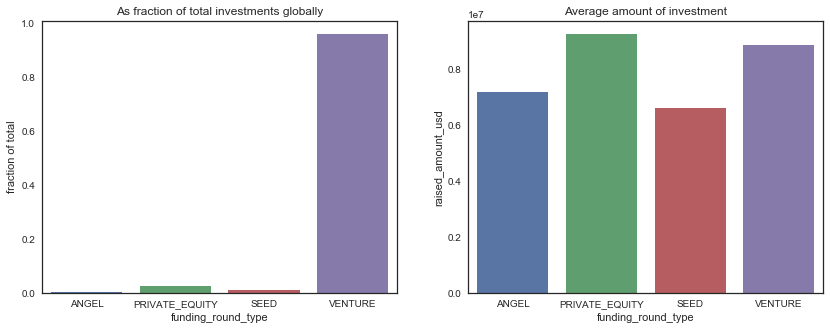

In [23]:
###############################################################################################3
#Plot showing the fraction of total investments (globally) in venture, seed, and private equity,
#and the average amount of investment in each funding type.This chart should make it clear that 
#a certain funding type (Venture) is best suited for Spark Funds
###############################################################################################
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
plt.figure(1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(221)
plt.title('As fraction of total investments globally')
sns.barplot(x='funding_round_type', y='fraction of total', data=fundtype_fraction,estimator=np.sum,linewidth=10 )

plt.subplot(222)
plt.title('Average amount of investment')
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=fundtype_average,estimator=np.sum,linewidth=10 )

plt.show()


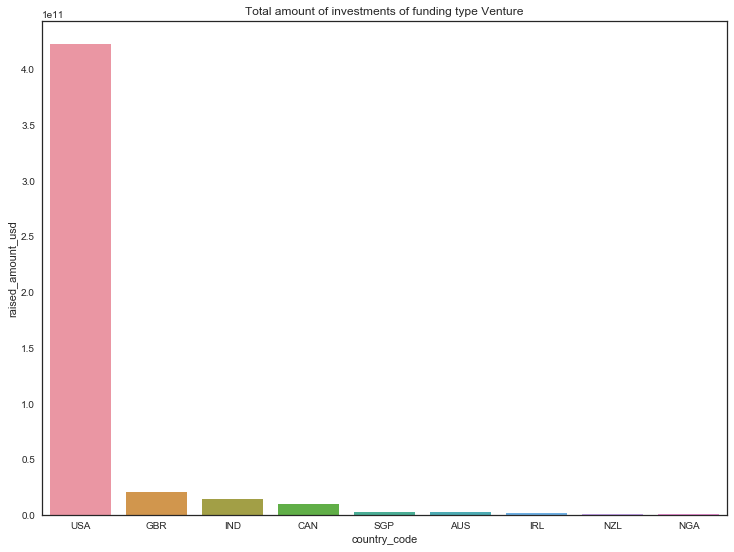

In [25]:
####################################################################################################
#Plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
######################################################################################################
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
plt.figure(1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 27
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(221)
plt.title('Total amount of investments of funding type Venture')
# bar plot with default statistic=mean
sns.barplot(x='country_code', y='raised_amount_usd', data=sort_top9.head(9),estimator=np.sum,linewidth=10 )
#plt.ylim(220713100, 480595900000)
plt.show()

In [27]:
#################################################################################################
# Data For plot 3 -Country C1
###################################################################################################33
sort_D1.head(3)

,main_sector,main_sector_count,main_sector_total_amount
6,Others,2950,2.632101e+10
7,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
1,Cleantech / Semiconductors,2300,2.120663e+10


In [28]:
#################################################################################################
# Data For plot 3 -Country C2
###################################################################################################33
sort_D2.head(3)

,main_sector,main_sector_count,main_sector_total_amount
6,Others,147,1.283624e+09
7,"Social, Finance, Analytics, Advertising",133,1.089404e+09
1,Cleantech / Semiconductors,128,1.150140e+09


In [29]:
#################################################################################################
# Data For plot 3 -Country C3
###################################################################################################33
sort_D3.head(3)

,main_sector,main_sector_count,main_sector_total_amount
6,Others,110,1.013410e+09
7,"Social, Finance, Analytics, Advertising",60,5.505496e+08
5,"News, Search and Messaging",52,4.338345e+08


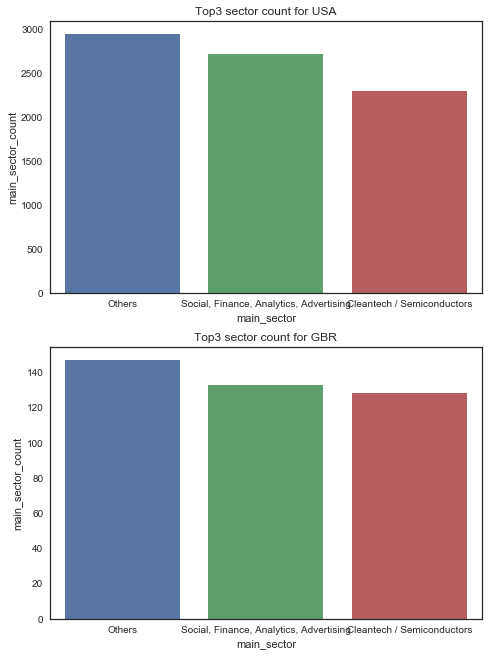

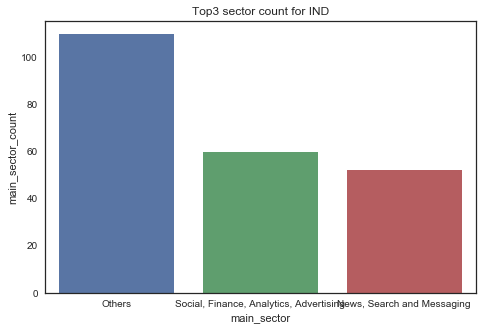

In [31]:
#################################################################################################
#Plot showing the number of investments in the top 3 sectors of the top 3 countries on one 
#chart (for the chosen investment type FT). 
###################################################################################################33
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
plt.figure(1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(221)
plt.title('Top3 sector count for USA')
sns.barplot(x='main_sector', y='main_sector_count', data=sort_D1.head(3),estimator=np.sum,linewidth=10 )

plt.subplot(223)
plt.title('Top3 sector count for GBR')
sns.barplot(x='main_sector', y='main_sector_count', data=sort_D2.head(3),estimator=np.sum,linewidth=10 )
plt.show()

plt.subplot(224)
plt.title('Top3 sector count for IND')
sns.barplot(x='main_sector', y='main_sector_count', data=sort_D3.head(3),estimator=np.sum,linewidth=10 )
plt.show()